In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install yellowbrick

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [2]:
df = pd.read_csv("../dataset/house_features.csv" )

In [3]:
df

,Listing ID,Address,Suburb,Postcode,PropType,Price,Status,CBD Distance,Bedroom,Bathroom,Car-Garage,Landsize,Building Area,Built Year,RE Agency
0,REA6524,10/68 Kororoit Creek Rd,Williamstown North,3016,u,285000,S,8.9,1,1,1,272,226.666667,2011.0,Williams
1,REA9338,10/12 St Huberts Rd,Carnegie,3163,u,350000,S,11.4,1,1,1,251,156.875000,1980.0,HockingStuart
2,REA8004,1/25 Morell St,Glenroy,3046,h,420000,PI,13.0,3,1,2,400,181.818182,1989.0,Raine
3,REA28612,5/1 King St,Hampton East,3188,u,491000,S,13.8,1,1,1,213,133.125000,2013.0,Buxton
4,REA18305,24 Crawford Av,Dandenong North,3175,h,614000,S,24.7,4,2,2,680,323.809524,1980.0,First National & Partners
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33433,REA4622,18 Kanowna St,Hampton,3188,h,2130000,S,13.7,4,2,2,714,510.000000,1971.0,HockingStuart
33434,REA6595,14 Carlyle St,Hawthorn East,3123,h,2354875,S,7.5,2,1,0,541,386.428571,1984.0,Marshall White
33435,REA8363,4a Hartington St,Kew,3101,h,2652875,S,5.6,3,1,2,554,240.869565,1991.0,Jellis Craig
33436,REA35554,25 Barrington Av,Kew,3101,h,2652875,S,5.4,4,3,2,737,307.083333,1995.0,Jellis Craig


In [4]:
df.describe()

,Postcode,Price,CBD Distance,Bedroom,Bathroom,Car-Garage,Landsize,Building Area,Built Year
count,33438.000000,3.343800e+04,33438.000000,33438.000000,33438.000000,33438.000000,33438.000000,33438.000000,33438.000000
mean,3117.152072,1.175051e+06,11.327621,2.878462,1.657605,1.649710,470.699533,280.001471,1990.065973
std,109.579283,7.239770e+05,6.765706,0.992993,0.754782,0.960226,171.115155,106.381330,22.164419
min,3002.000000,8.500000e+04,0.700000,1.000000,1.000000,0.000000,120.000000,100.000000,1854.000000
25%,3053.000000,6.800000e+05,6.500000,2.000000,1.000000,1.000000,339.000000,199.480263,1982.000000
50%,3103.000000,9.612500e+05,10.400000,3.000000,2.000000,2.000000,485.000000,265.454545,1994.000000
75%,3161.000000,1.440375e+06,14.000000,4.000000,2.000000,2.000000,610.000000,341.666667,2005.000000
max,3978.000000,1.120000e+07,48.100000,12.000000,12.000000,26.000000,800.000000,665.833333,2020.000000


In [5]:
df = df.drop(['Address', 'Listing ID', 'PropType'], axis=1)

In [6]:
df.columns

Index(['Suburb', 'Postcode', 'Price', 'Status', 'CBD Distance', 'Bedroom',
       'Bathroom', 'Car-Garage', 'Landsize', 'Building Area', 'Built Year',
       'RE Agency'],
      dtype='object')

In [7]:
suburb_encoder = LabelEncoder()
status_encoder = LabelEncoder()
re_agency_encoder = LabelEncoder()

In [8]:
df['Suburb'] = suburb_encoder.fit_transform(df['Suburb'])
df['Status'] = status_encoder.fit_transform(df['Status'])
df['RE Agency'] = re_agency_encoder.fit_transform(df['RE Agency'])

df['Price'] = np.log(df['Price'])

In [9]:
df.describe()

,Suburb,Postcode,Price,Status,CBD Distance,Bedroom,Bathroom,Car-Garage,Landsize,Building Area,Built Year,RE Agency
count,33438.000000,33438.000000,33438.000000,33438.000000,33438.000000,33438.000000,33438.000000,33438.000000,33438.000000,33438.000000,33438.000000,33438.000000
mean,164.575393,3117.152072,13.823988,2.705515,11.327621,2.878462,1.657605,1.649710,470.699533,280.001471,1990.065973,153.516119
std,96.614398,109.579283,0.542566,1.972303,6.765706,0.992993,0.754782,0.960226,171.115155,106.381330,22.164419,90.408324
min,0.000000,3002.000000,11.350407,0.000000,0.700000,1.000000,1.000000,0.000000,120.000000,100.000000,1854.000000,0.000000
25%,73.000000,3053.000000,13.429848,2.000000,6.500000,2.000000,1.000000,1.000000,339.000000,199.480263,1982.000000,90.000000
50%,164.000000,3103.000000,13.775990,2.000000,10.400000,3.000000,2.000000,2.000000,485.000000,265.454545,1994.000000,137.000000
75%,250.000000,3161.000000,14.180414,4.000000,14.000000,4.000000,2.000000,2.000000,610.000000,341.666667,2005.000000,208.000000
max,336.000000,3978.000000,16.231424,8.000000,48.100000,12.000000,12.000000,26.000000,800.000000,665.833333,2020.000000,353.000000


In [10]:
scaler = StandardScaler()

In [11]:
df[['CBD Distance', 'Bedroom', 'Bathroom', 'Car-Garage', 'Landsize', 'Building Area',  'Suburb', 'RE Agency', 'Status']] = scaler.fit_transform(df[['CBD Distance', 'Bedroom', 'Bathroom', 'Car-Garage', 'Landsize', 'Building Area',  'Suburb', 'RE Agency', 'Status']])

In [12]:
df

,Suburb,Postcode,Price,Status,CBD Distance,Bedroom,Bathroom,Car-Garage,Landsize,Building Area,Built Year,RE Agency
0,1.691539,3016,12.560244,-0.357716,-0.358818,-1.891745,-0.871265,-0.676632,-1.161221,-0.501362,2011.0,2.040594
1,-1.041014,3163,12.765688,-0.357716,0.010698,-1.891745,-0.871265,-0.676632,-1.283947,-1.157424,1980.0,-0.337542
2,-0.181915,3046,12.948010,-1.371775,0.247188,0.122398,-0.871265,0.364805,-0.413176,-0.922951,1989.0,1.144645
3,-0.109461,3188,13.104199,-0.357716,0.365434,-1.891745,-0.871265,-0.676632,-1.506023,-1.380681,2013.0,-1.156063
4,-0.678743,3175,13.327750,-0.357716,1.976524,1.129469,0.453641,0.364805,1.223174,0.411808,1980.0,-0.625130
...,...,...,...,...,...,...,...,...,...,...,...,...
33433,-0.119812,3188,14.571633,-0.357716,0.350653,1.129469,0.453641,0.364805,1.421874,2.162052,1971.0,-0.337542
33434,-0.078410,3123,14.671998,-0.357716,-0.565747,-0.884674,-0.871265,-1.718069,0.410843,1.000445,1984.0,0.292941
33435,0.159654,3101,14.791155,-0.357716,-0.846579,0.122398,-0.871265,0.364805,0.486817,-0.367851,1991.0,-0.182686
33436,0.159654,3101,14.791155,-0.357716,-0.876141,1.129469,1.778547,0.364805,1.556288,0.254577,1995.0,-0.182686


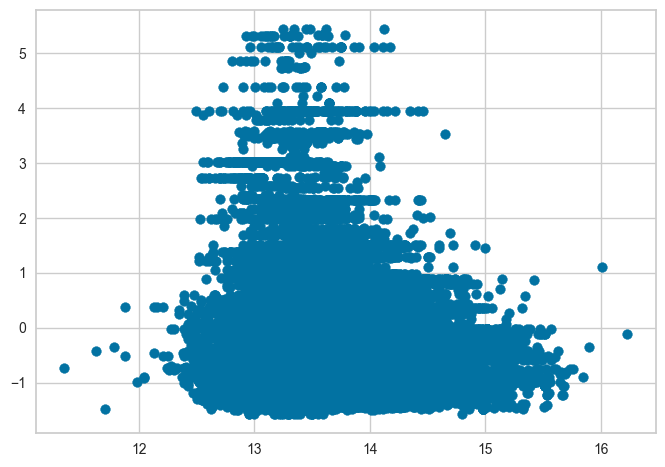

In [13]:

plt.scatter(x=df['Price'], y=df['CBD Distance'])
plt.show()

In [14]:
df = df.drop(['Bathroom', 'Bedroom', 'Car-Garage'], axis=1)

In [15]:
dist_df = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Price', 'CBD Distance']])
    dist_df.append([k, kmeans.inertia_])
dist_df = pd.DataFrame(dist_df, columns=['Number of Cluster','Inertia'])

In [16]:
dist_df


,Number of Cluster,Inertia
0,1,43281.106932
1,2,23045.042859
2,3,15412.028253
3,4,12673.374236
4,5,8780.918538
5,6,8106.988234
6,7,6213.813943
7,8,5393.313022
8,9,4726.716218
9,10,4271.071648


In [17]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig =plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

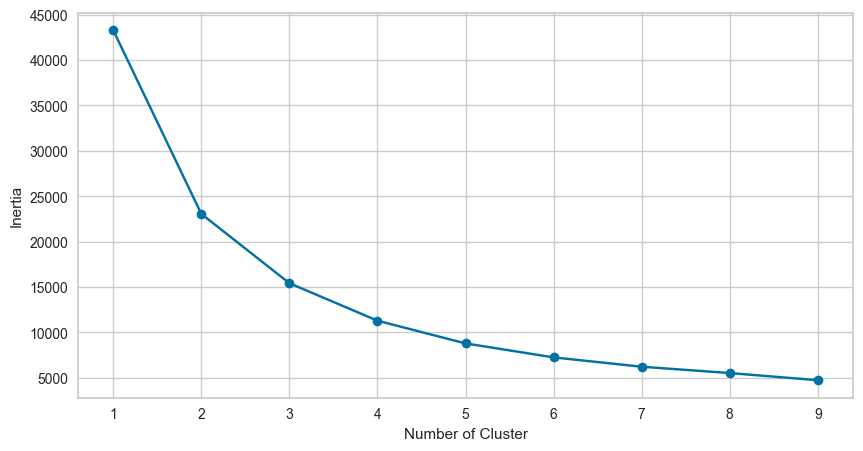

In [18]:
optimise_k_means(df[['Price', 'CBD Distance']], 10)

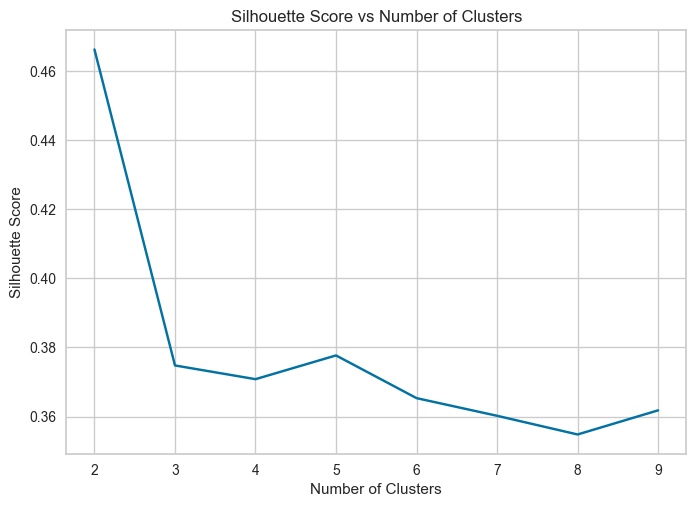

In [19]:
sil_score = []
cluster_list = list(np.arange(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters = n_clusters)
    preds = clusterer.fit_predict(df[['Price', 'CBD Distance']])
    score = silhouette_score(df[['Price', 'CBD Distance']], preds)
    sil_score.append(score)
plt.plot(cluster_list, sil_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

In [20]:
sil_score


[np.float64(0.4662465664084293),
 np.float64(0.37478963484494593),
 np.float64(0.37081868629146664),
 np.float64(0.37769083017602945),
 np.float64(0.3653303581665522),
 np.float64(0.3602209546717556),
 np.float64(0.3548127647170737),
 np.float64(0.361795925988067)]

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

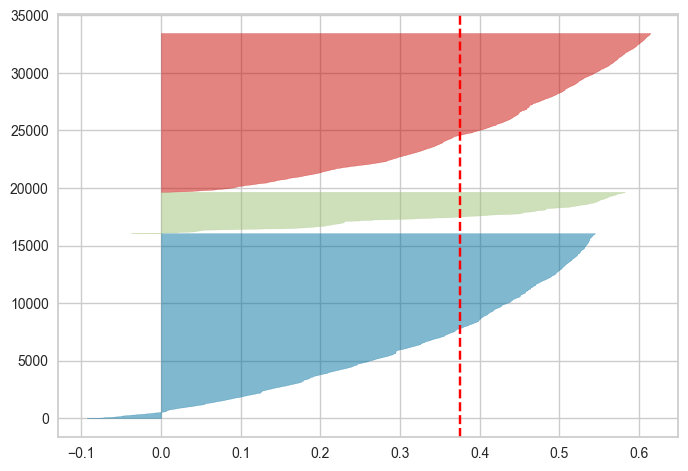

In [21]:
visualizer = SilhouetteVisualizer(KMeans(3,random_state=42), colors='yellowbrick')
visualizer.fit(df[['Price', 'CBD Distance']])

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=42))

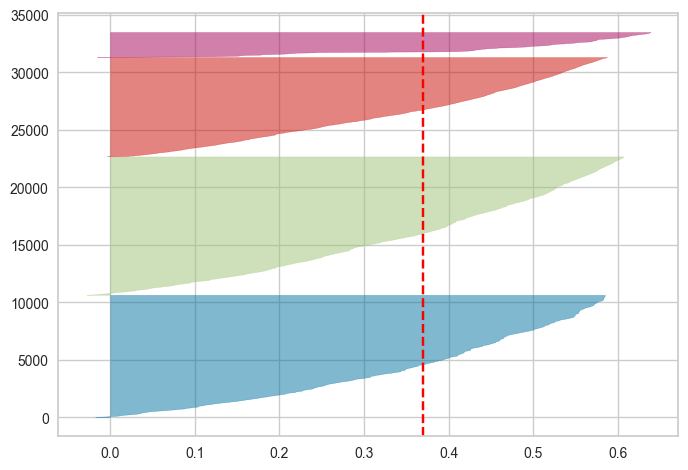

In [22]:
visualizer = SilhouetteVisualizer(KMeans(4,random_state=42), colors='yellowbrick')
visualizer.fit(df[['Price', 'CBD Distance']])

In [23]:
x = np.array(df[['Price', 'CBD Distance']])
n_cluster = 3
kmeans = KMeans(n_clusters = n_clusters)
clust = kmeans.fit(x)
cl = clust.labels_

db_score = davies_bouldin_score(x, cl)
db_score

np.float64(0.7989975032841575)

In [24]:
x = np.array(df[['Price', 'CBD Distance']])
n_cluster = 3
kmeans = KMeans(n_clusters = n_clusters)
clust = kmeans.fit(x)
cl = clust.labels_

db_score = davies_bouldin_score(x, cl)
db_score

np.float64(0.801458028038218)

In [25]:
x = np.array(df[['Price', 'CBD Distance']])
n_cluster = 4
kmeans = KMeans(n_clusters = n_clusters)
clust = kmeans.fit(x)
cl = clust.labels_

db_score = davies_bouldin_score(x, cl)
db_score

np.float64(0.8015193997630587)

In [26]:
x = np.array(df[['Price', 'CBD Distance']])
n_cluster = 3
kmeans = KMeans(n_clusters = n_clusters)
clust = kmeans.fit(x)
cl = clust.labels_

ch_score = calinski_harabasz_score(x, cl)
ch_score

np.float64(33124.35946306253)

In [27]:
x = np.array(df[['Price', 'CBD Distance']])
n_cluster = 4
kmeans = KMeans(n_clusters = n_clusters)
clust = kmeans.fit(x)
cl = clust.labels_

ch_score = calinski_harabasz_score(x, cl)
ch_score

np.float64(33809.93692167819)

In [28]:
kmeans = KMeans(n_clusters=3)

In [29]:
kmeans.fit(df[['Price', 'CBD Distance']])

KMeans(n_clusters=3)

In [30]:
df['kmeans_3'] = kmeans.labels_

In [31]:
df

,Suburb,Postcode,Price,Status,CBD Distance,Landsize,Building Area,Built Year,RE Agency,kmeans_3
0,1.691539,3016,12.560244,-0.357716,-0.358818,-1.161221,-0.501362,2011.0,2.040594,0
1,-1.041014,3163,12.765688,-0.357716,0.010698,-1.283947,-1.157424,1980.0,-0.337542,0
2,-0.181915,3046,12.948010,-1.371775,0.247188,-0.413176,-0.922951,1989.0,1.144645,0
3,-0.109461,3188,13.104199,-0.357716,0.365434,-1.506023,-1.380681,2013.0,-1.156063,0
4,-0.678743,3175,13.327750,-0.357716,1.976524,1.223174,0.411808,1980.0,-0.625130,2
...,...,...,...,...,...,...,...,...,...,...
33433,-0.119812,3188,14.571633,-0.357716,0.350653,1.421874,2.162052,1971.0,-0.337542,0
33434,-0.078410,3123,14.671998,-0.357716,-0.565747,0.410843,1.000445,1984.0,0.292941,1
33435,0.159654,3101,14.791155,-0.357716,-0.846579,0.486817,-0.367851,1991.0,-0.182686,1
33436,0.159654,3101,14.791155,-0.357716,-0.876141,1.556288,0.254577,1995.0,-0.182686,1


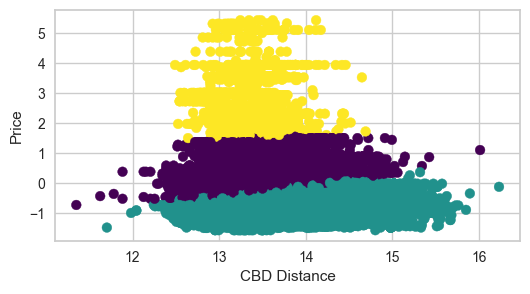

In [32]:
plt.figure(figsize=(6, 3))
plt.scatter(x=df['Price'], y=df['CBD Distance'], c=df['kmeans_3'], cmap='viridis')
plt.ylabel('Price')
plt.xlabel('CBD Distance')
plt.show()